In [168]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [169]:
# Creating data to view and feed

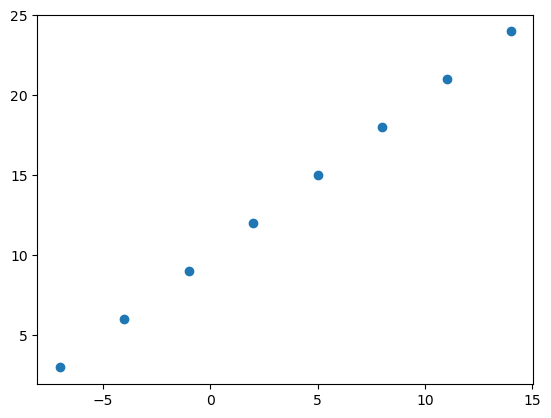

In [170]:
import numpy as np
import matplotlib.pyplot as plt

#Create the features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visulize it
plt.scatter(x,y);

In [171]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [172]:
# Inputs and Outputs Shapes

In [173]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["beadroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beadroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [174]:
x[0],y[0]

(-7.0, 3.0)

In [175]:
x[1],y[1]

(-4.0, 6.0)

In [176]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [177]:
x[0].ndim

0

In [178]:
# Turn our Numpy arrays into tensor

In [179]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [180]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

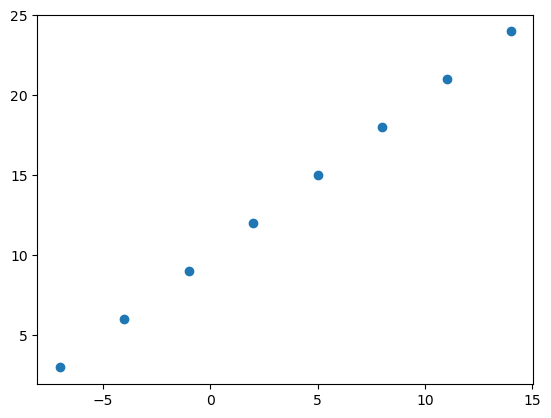

In [181]:
plt.scatter(x,y)

In [182]:
#Modelling with Tensorflow

In [183]:
# 1.Create a model using the Sequential API
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.legacy.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
# model.fit(x,y,epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

# 4.Evaluate the model
# model.evaluate(x_test,y_test)

Epoch 1/5
1/1 [==============================] - 0s 136ms/step - loss: 13.8320 - mae: 13.8320
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 13.6995 - mae: 13.6995
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 13.5670 - mae: 13.5670
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 13.4345 - mae: 13.4345
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 13.3020 - mae: 13.3020


2023-08-21 08:37:44.740054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [184]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [185]:
# try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 25ms/step


2023-08-21 08:37:44.865678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[1.4124941]], dtype=float32)

In [186]:
# Imporving our model

In [187]:
# 1. Create the model
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)
#2.Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics=["mae"] 
             )

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5


/Users/ashfaqkhanrafin/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 135ms/step - loss: 19.4086 - mae: 19.4086
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 19.4080 - mae: 19.4080


2023-08-21 08:37:44.995328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 19.4074 - mae: 19.4074
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 19.4068 - mae: 19.4068
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 19.4062 - mae: 19.4062


In [188]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 26ms/step


2023-08-21 08:37:45.123878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[-21.552084]], dtype=float32)

In [189]:
# Lets rebuild the model

# 1.Create the model
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

# 2.Compile the Model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)
#3.fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 115ms/step - loss: 14.3317 - mae: 14.3317
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.1992 - mae: 14.1992
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14.0667 - mae: 14.0667
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9342 - mae: 13.9342
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8017 - mae: 13.8017
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6692 - mae: 13.6692
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 13.5367 - mae: 13.5367

2023-08-21 08:37:45.223594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 5ms/step - loss: 13.5367 - mae: 13.5367
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4042 - mae: 13.4042
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2717 - mae: 13.2717
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1392 - mae: 13.1392
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 13.0067 - mae: 13.0067
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 12.8742 - mae: 12.8742
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 12.7417 - mae: 12.7417
Epoch 14/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6092 - mae: 12.6092
Epoch 15/100
1/1 [==============================] - 0s 5ms/step - loss: 12.4767 - mae: 12.4767
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3442 - mae: 12.3442
Epoch 17/100
1/1 [==============================] - 0s 5ms/step -

In [190]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 26ms/step


2023-08-21 08:37:46.013029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[29.572796]], dtype=float32)

In [191]:
#Adding Adam optimizer
# Lets rebuild the model

# 1.Create the model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50,activation=None),
        tf.keras.layers.Dense(1)
    ]
)

# 2.Compile the Model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]
)
#3.fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


2023-08-21 08:37:46.163339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 175ms/step - loss: 14.2380 - mae: 14.2380
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4992 - mae: 13.4992
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7607 - mae: 12.7607
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0215 - mae: 12.0215
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2798 - mae: 11.2798
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5335 - mae: 10.5335
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7799 - mae: 9.7799
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0166 - mae: 9.0166
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2414 - mae: 8.2414
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4521 - mae: 7.4521
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.646

In [192]:
model.predict([17.0,7.0])

1/1 [==============================] - 0s 28ms/step


2023-08-21 08:37:47.079072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[27.537928],
       [17.320412]], dtype=float32)

In [193]:
##Evaluting a model

In [194]:
x=tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [195]:
y=x+10

In [196]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

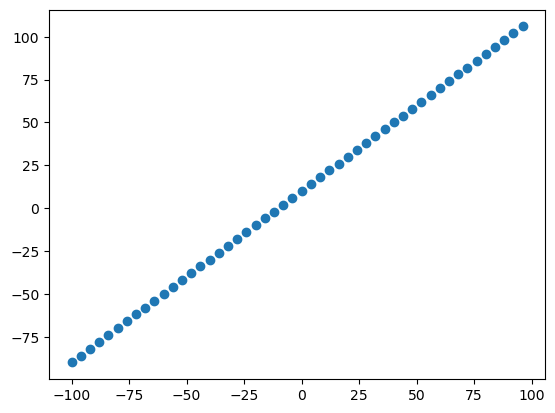

In [197]:
#visulizing the data
import matplotlib.pyplot as plt

plt.scatter(x,y)

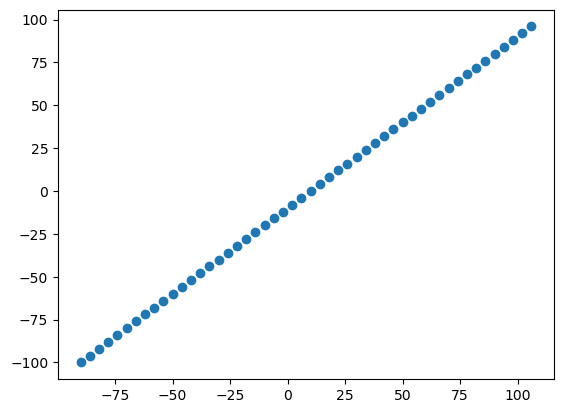

In [198]:
plt.scatter(y,x)

### The 3 sets...
***Traning set***-the model learns from this data,which is typically 70-80% of the total data i have available.

***Validation set***- the model gets tuned on this data, which is typically 10-15% of the data available.

***Test set***- the model gets evaluated on this data to test what is has learned, this set typically 10-15% of the total data available

In [199]:
#check the length of how many samples we have
len(x)

50

In [200]:
#Split the data into train and test set
x_train=x[:40]
y_train=y[:40]
x_test=x[40:]
y_test=y[40:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

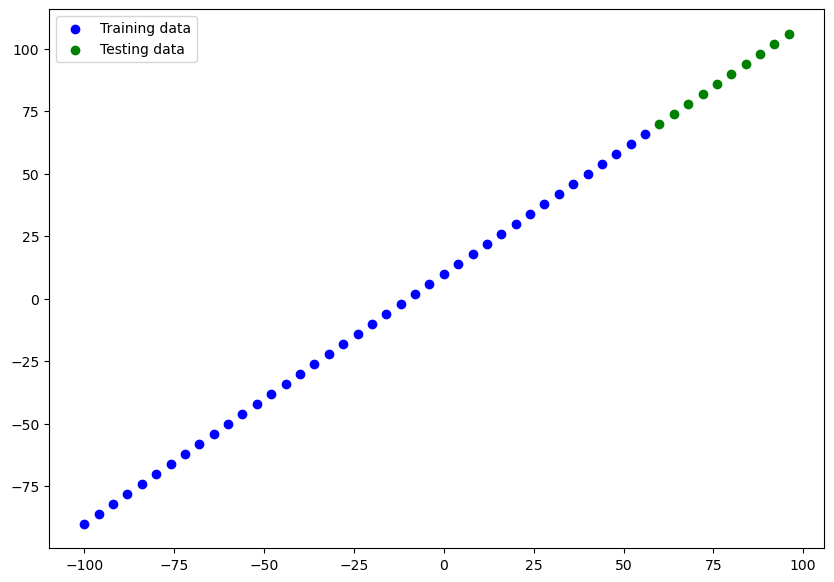

In [201]:
#visualizing the data
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train,y_train,c="b",label="Training data")
#plot training data in green
plt.scatter(x_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend();

In [202]:
# Lets have a look at how to build a neural nwtwork for our data

#1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)
# 3. Fit the model
# model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

In [203]:
x[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [204]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
# tf.random.set_seed(42)

#1.create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2.compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

In [205]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
#lets fit our model to the training data
model.fit(x_train,y_train,epochs=100,verbose=0)

2023-08-21 08:37:47.569407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [207]:
#get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


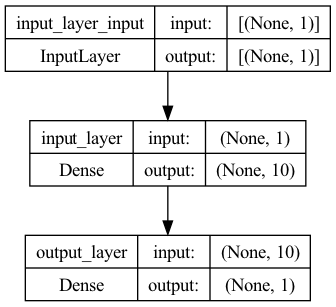

In [208]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [209]:
#make some predictions 
y_pred=model.predict(x_test)
y_pred

1/1 [==============================] - 0s 26ms/step


2023-08-21 08:37:48.674095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 70.3354  ],
       [ 74.91026 ],
       [ 79.485115],
       [ 84.05997 ],
       [ 88.63482 ],
       [ 93.20969 ],
       [ 97.78454 ],
       [102.35939 ],
       [106.93426 ],
       [111.50911 ]], dtype=float32)

In [210]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

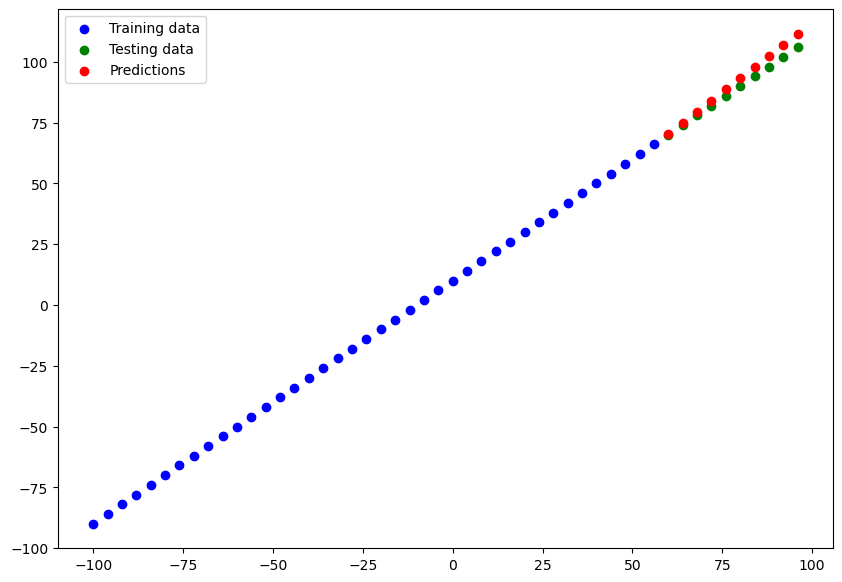

In [211]:
#lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c="g",label="Testing data")
    #plot the model's predictions in red
    plt.scatter(test_data,predictions,c="r",label="Predictions")
    #show the legend
    plt.legend();

plot_predictions()

In [212]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 163ms/step - loss: 2.9223 - mae: 2.9223


2023-08-21 08:42:42.213776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[2.922255039215088, 2.922255039215088]

In [225]:
#calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.731678, 14.253842, 11.805954, 10.388007, 10.      , 10.641937,
       12.313815, 15.087512, 18.934258, 23.50911 ], dtype=float32)>

In [226]:
tf.squeeze(y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.3354  ,  74.91026 ,  79.485115,  84.05997 ,  88.63482 ,
        93.20969 ,  97.78454 , 102.35939 , 106.93426 , 111.50911 ],
      dtype=float32)>

In [238]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.922255>

In [240]:
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.265866>

In [242]:
pow(2.922255,2)

8.539574285025